# Title placeholder



## Introduction

This is the repository for the code used to perform the analysis of the Hockey stats about players, goalies and games.

## Questions to be answered

These are the questions I am going to answer on this notebook:

1. What are the league best player and goalie
2. What are the best scorer players per team
3. What are the players that have most penalty minutes per team
4. Do home teams win more games?
5. What is the most prolific country producing NHL players?
6. Are the best players all coming from Canada?

## Acknowledgements

I cannot thank enough Jeremy Howard from [fast.ai](https://www.fast.ai/) for his incredible tools and tutorials. I borrowed a lot form his libraries.

The Data set was obtained from Kaggle's user [Martin Ellis](https://www.kaggle.com/martinellis). Thanks a ton Martin!! It is super hard to find such quality data for the NHL.



## Loading required libraries

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

I add this PATH variable so I don't have to type it every time to load data into pandas.

In [3]:
PATH = '../nhl-game-data/'

Loading the data I am interested

In [4]:
team_info = pd.read_csv(f'{PATH}team_info.csv', low_memory=False)
player_info = pd.read_csv(f'{PATH}player_info.csv', low_memory=False, parse_dates=["birthDate"])
game_skater_stats = pd.read_csv(f'{PATH}game_skater_stats.csv', low_memory=False)
game_goalie_stats = pd.read_csv(f'{PATH}game_goalie_stats.csv', low_memory=False)
game = pd.read_csv(f'{PATH}game.csv', low_memory=False, parse_dates=["date_time", "date_time_GMT"])

This function is borrowed from fast.ai. It lists all the data so we can see it completely in one shot (eliminating the $\dots$ dots) in Jupyter's output.

In [5]:
def display_all(df):
    '''
    INPUT - data frame - pandas dataframe with the data to display
    OUTPUT - 
            display the dataframe with 1,000 rows and columns setting
    '''
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [6]:
def display_bar_plot(x, y):
    '''
    INPUT - x and y axis from the datas set to plot
    OUTPUT - 
            display the dataframe's bar plot
    '''
    plt.figure(figsize=(16,6))
    ax = sns.barplot(x=x, y=y, palette='Blues_d')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

## Look at the data

In [7]:
display_all(team_info.tail().T)

,28,29,30,31,32
team_id,22,54,12,53,11
franchiseId,25,38,26,28,35
shortName,Edmonton,Vegas,Carolina,Arizona,Atlanta
teamName,Oilers,Golden Knights,Hurricanes,Coyotes,Thrashers
abbreviation,EDM,VGK,CAR,ARI,ATL
link,/api/v1/teams/22,/api/v1/teams/54,/api/v1/teams/12,/api/v1/teams/53,/api/v1/teams/11


I am going to remove all columns I really don't need for my analysis like *franchiseId* and *link* from the data frame.

In [8]:
team_info.drop(columns=['franchiseId', 'link'], inplace=True)

In [9]:
display_all(player_info.tail().T)

,2404,2405,2406,2407,2408
player_id,8478040,8480011,8480384,8480021,8477352
firstName,Austin,Klim,Alexander,Jack,Ryan
lastName,Poganski,Kostin,True,Studnicka,Fitzgerald
nationality,USA,RUS,DNK,CAN,USA
birthCity,St. Cloud,Penza,Kobenhavn,Windsor,Boca Raton
primaryPosition,RW,C,C,C,C
birthDate,1996-02-16 00:00:00,1999-05-05 00:00:00,1997-07-17 00:00:00,1999-02-18 00:00:00,1994-10-19 00:00:00
link,/api/v1/people/8478040,/api/v1/people/8480011,/api/v1/people/8480384,/api/v1/people/8480021,/api/v1/people/8477352


In [10]:
player_info.drop(columns=['birthCity', 'link'], inplace=True)

In [11]:
display_all(game_skater_stats.tail().T)

,411573,411574,411575,411576,411577
game_id,2018030417,2018030417,2018030417,2018030417,2018030417
player_id,8475807,8475149,8475745,8478443,8478046
team_id,6,6,6,6,6
timeOnIce,501,1062,913,1006,909
assists,0,0,0,0,0
goals,0,0,0,0,0
shots,1,2,2,1,2
hits,2,0,3,1,0
powerPlayGoals,0,0,0,0,0
powerPlayAssists,0,0,0,0,0


In [12]:
display_all(game_goalie_stats.tail().T)

,24641,24642,24643,24644,24645
game_id,2018030415,2018030416,2018030416,2018030417,2018030417
player_id,8471695,8471695,8476412,8476412,8471695
team_id,6,6,19,19,6
timeOnIce,3522,3600,3487,3600,3394
assists,0,0,0,0,0
goals,0,0,0,0,0
pim,0,0,0,0,0
shots,21,29,31,33,20
saves,19,28,27,32,16
powerPlaySaves,1,12,3,3,0


In [13]:
display_all(game.tail().T)

,11429,11430,11431,11432,11433
game_id,2018030413,2018030414,2018030415,2018030416,2018030417
season,20182019,20182019,20182019,20182019,20182019
type,P,P,P,P,P
date_time,2019-06-02 00:00:00,2019-06-04 00:00:00,2019-06-07 00:00:00,2019-06-10 00:00:00,2019-06-13 00:00:00
date_time_GMT,2019-06-02 00:00:00+00:00,2019-06-04 00:00:00+00:00,2019-06-07 00:00:00+00:00,2019-06-10 00:00:00+00:00,2019-06-13 00:00:00+00:00
away_team_id,6,6,19,6,19
home_team_id,19,19,6,19,6
away_goals,7,2,2,5,4
home_goals,2,4,1,1,1
outcome,away win REG,home win REG,away win REG,away win REG,away win REG


In [14]:
game.drop(columns=['venue_link'], inplace=True)

### Describe the dataframes

In [15]:
display_all(team_info.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
team_id,33,NaN,NaN,NaN,18.9091,13.7894,1,9,17,25,54
shortName,33,33,Tampa Bay,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teamName,33,32,Coyotes,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abbreviation,33,33,BUF,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
display_all(player_info.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
player_id,2409,NaN,NaN,NaN,NaT,NaT,8.47399e+06,4659.58,8.44648e+06,8.47127e+06,8.47517e+06,8.47724e+06,8.48149e+06
firstName,2409,703,Ryan,54,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lastName,2409,2045,Smith,12,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality,2400,25,CAN,1146,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
primaryPosition,2409,5,D,744,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birthDate,2409,2033,1991-01-03 00:00:00,5,1960-10-24,2000-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
display_all(game_skater_stats.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
game_id,411578.0,2.014135e+09,2.609464e+06,2.010020e+09,2.012020e+09,2.014021e+09,2.016021e+09,2.018030e+09
player_id,411578.0,8.472868e+06,4.043732e+03,8.446485e+06,8.470607e+06,8.473933e+06,8.475772e+06,8.481486e+06
team_id,411578.0,1.742942e+01,1.195902e+01,1.000000e+00,8.000000e+00,1.600000e+01,2.400000e+01,5.400000e+01
timeOnIce,411578.0,9.936149e+02,2.978773e+02,1.000000e+00,7.980000e+02,1.001000e+03,1.192000e+03,3.197000e+03
assists,411578.0,2.585707e-01,5.272847e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
goals,411578.0,1.523988e-01,4.044898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
shots,411578.0,1.688545e+00,1.541746e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.500000e+01
hits,411578.0,1.311576e+00,1.461236e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,1.500000e+01
powerPlayGoals,411578.0,3.290992e-02,1.847043e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
powerPlayAssists,411578.0,6.265155e-02,2.592601e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00


In [18]:
display_all(game_goalie_stats.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
game_id,24646,NaN,NaN,NaN,2.01413e+09,2.60929e+06,2.01002e+09,2.01202e+09,2.01402e+09,2.01602e+09,2.01803e+09
player_id,24646,NaN,NaN,NaN,8.47183e+06,4194.51,8.45571e+06,8.47032e+06,8.47172e+06,8.47489e+06,8.48092e+06
team_id,24646,NaN,NaN,NaN,17.4428,11.9427,1,8,16,24,54
timeOnIce,24646,NaN,NaN,NaN,3370.28,735.547,0,3516,3598,3600,6972
assists,24646,NaN,NaN,NaN,0.0211393,0.145534,0,0,0,0,2
goals,24646,NaN,NaN,NaN,0.000121724,0.0110324,0,0,0,0,1
pim,24646,NaN,NaN,NaN,0.0570072,0.47339,0,0,0,0,29
shots,24646,NaN,NaN,NaN,28.0894,8.84034,0,23,29,34,64
saves,24646,NaN,NaN,NaN,25.6558,8.68687,0,21,26,31,60
powerPlaySaves,24646,NaN,NaN,NaN,3.71427,2.99286,0,1,3,5,25


In [19]:
display_all(game.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
game_id,11434,NaN,NaN,NaN,NaN,NaN,2.01413e+09,2.60962e+06,2.01002e+09,2.01202e+09,2.01402e+09,2.01602e+09,2.01803e+09
season,11434,NaN,NaN,NaN,NaN,NaN,2.01431e+07,26098.9,2.0102e+07,2.0122e+07,2.0142e+07,2.0162e+07,2.0182e+07
type,11434,2,R,10642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_time,11434,1923,2012-03-11 00:00:00,16,2010-10-07 00:00:00,2019-06-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_time_GMT,11434,7156,2014-10-11 23:00:00+00:00,9,2010-10-07 16:00:00+00:00,2019-06-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_team_id,11434,NaN,NaN,NaN,NaN,NaN,17.429,11.9594,1,8,16,24,54
home_team_id,11434,NaN,NaN,NaN,NaN,NaN,17.4292,11.9591,1,8,16,24,54
away_goals,11434,NaN,NaN,NaN,NaN,NaN,2.65917,1.58953,0,1,3,4,10
home_goals,11434,NaN,NaN,NaN,NaN,NaN,2.92933,1.68022,0,2,3,4,10
outcome,11434,6,home win REG,4857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's check the type of each column

In [20]:
team_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
team_id         33 non-null int64
shortName       33 non-null object
teamName        33 non-null object
abbreviation    33 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


In [21]:
player_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409 entries, 0 to 2408
Data columns (total 6 columns):
player_id          2409 non-null int64
firstName          2409 non-null object
lastName           2409 non-null object
nationality        2400 non-null object
primaryPosition    2409 non-null object
birthDate          2409 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 113.0+ KB


In [22]:
game_skater_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411578 entries, 0 to 411577
Data columns (total 22 columns):
game_id                 411578 non-null int64
player_id               411578 non-null int64
team_id                 411578 non-null int64
timeOnIce               411578 non-null int64
assists                 411578 non-null int64
goals                   411578 non-null int64
shots                   411578 non-null int64
hits                    411578 non-null int64
powerPlayGoals          411578 non-null int64
powerPlayAssists        411578 non-null int64
penaltyMinutes          411578 non-null int64
faceOffWins             411578 non-null int64
faceoffTaken            411578 non-null int64
takeaways               411578 non-null int64
giveaways               411578 non-null int64
shortHandedGoals        411578 non-null int64
shortHandedAssists      411578 non-null int64
blocked                 411578 non-null int64
plusMinus               411578 non-null int64
evenTimeOnIce  

In [23]:
game_goalie_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24646 entries, 0 to 24645
Data columns (total 19 columns):
game_id                       24646 non-null int64
player_id                     24646 non-null int64
team_id                       24646 non-null int64
timeOnIce                     24646 non-null int64
assists                       24646 non-null int64
goals                         24646 non-null int64
pim                           24646 non-null int64
shots                         24646 non-null int64
saves                         24646 non-null int64
powerPlaySaves                24646 non-null int64
shortHandedSaves              24646 non-null int64
evenSaves                     24646 non-null int64
shortHandedShotsAgainst       24646 non-null int64
evenShotsAgainst              24646 non-null int64
powerPlayShotsAgainst         24646 non-null int64
decision                      22868 non-null object
savePercentage                24607 non-null float64
powerPlaySavePercenta

In [24]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11434 entries, 0 to 11433
Data columns (total 15 columns):
game_id                   11434 non-null int64
season                    11434 non-null int64
type                      11434 non-null object
date_time                 11434 non-null datetime64[ns]
date_time_GMT             11434 non-null datetime64[ns, UTC]
away_team_id              11434 non-null int64
home_team_id              11434 non-null int64
away_goals                11434 non-null int64
home_goals                11434 non-null int64
outcome                   11434 non-null object
home_rink_side_start      11140 non-null object
venue                     11434 non-null object
venue_time_zone_id        11434 non-null object
venue_time_zone_offset    11434 non-null int64
venue_time_zone_tz        11434 non-null object
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int64(7), object(6)
memory usage: 1.3+ MB


### Let's address some null values

In [25]:
player_info[player_info['nationality'].isnull()]

,player_id,firstName,lastName,nationality,primaryPosition,birthDate
1445,8480373,Josef,Korenar,NaN,G,1998-01-31
1548,8480356,Kyle,Keyser,NaN,G,1999-03-08
2009,8479138,Scott,Foster,NaN,G,1982-01-17
2026,8480718,Ben,Wexler,NaN,G,1994-12-23
2079,8479439,Jacob,MacDonald,NaN,D,1993-02-26
2107,8479016,Landon,Bow,NaN,G,1995-08-24
2383,8481481,Blake,Lizotte,NaN,C,1997-12-13
2384,8480363,Kaden,Fulcher,NaN,G,1998-09-23
2386,8480779,Niclas,Westerholm,NaN,G,1997-08-13


A quick google search and I found all these players are mainly prospects so no surprise there is missing infomation about them. 

Scott Foster was Blackhawks contracted emergency goalie. He never suited up for a game during his tenure with the team. Until that luckly night during the 2017-2018 season when all Blackhawks' goalies where injured and he was called out to dress up. He played the "longest 14 minutes of Hockey" of his live as he described it himself in one of the countless interviews he did afterwards.

In [26]:
# Josef Korenar
player_info.at[1445, 'nationality'] = 'CZE'

# Kyle Keyser
player_info.at[1548, 'nationality'] = 'USA'

# Scott Foster
player_info.at[2009, 'nationality'] = 'CAN'

# Ben Wexler
player_info.at[2026, 'nationality'] = 'USA'

# Jacob MacDonald
player_info.at[2079, 'nationality'] = 'USA'

# Landon Bow
player_info.at[2107, 'nationality'] = 'CAN'

# Blake Lizotte
player_info.at[2383, 'nationality'] = 'USA'

# Kaden Fulcher
player_info.at[2384, 'nationality'] = 'CAN'

# Niclas Westerholm
player_info.at[2386, 'nationality'] = 'FIN'

## Merge data with player's, team's and game's information

In [27]:
skater = game_skater_stats.merge(player_info, on='player_id', how='left').merge(team_info, on='team_id', how='left')

In [28]:
goalie = game_goalie_stats.merge(player_info, on='player_id', how='left').merge(team_info, on='team_id', how='left')

In [29]:
skater_2 = skater.merge(game, on='game_id', how='left')

In [30]:
skater_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411578 entries, 0 to 411577
Data columns (total 44 columns):
game_id                   411578 non-null int64
player_id                 411578 non-null int64
team_id                   411578 non-null int64
timeOnIce                 411578 non-null int64
assists                   411578 non-null int64
goals                     411578 non-null int64
shots                     411578 non-null int64
hits                      411578 non-null int64
powerPlayGoals            411578 non-null int64
powerPlayAssists          411578 non-null int64
penaltyMinutes            411578 non-null int64
faceOffWins               411578 non-null int64
faceoffTaken              411578 non-null int64
takeaways                 411578 non-null int64
giveaways                 411578 non-null int64
shortHandedGoals          411578 non-null int64
shortHandedAssists        411578 non-null int64
blocked                   411578 non-null int64
plusMinus                

### Drop unnecesary columns and concatenate the player's first and last names

In [31]:
skater['fullName'] = skater['firstName'].str.cat(skater['lastName'], sep=' ')

In [32]:
goalie['fullName'] = goalie['firstName'].str.cat(goalie['lastName'], sep=' ')

In [33]:
skater.drop(['firstName', 'lastName', 'player_id', 'team_id'], axis=1, inplace=True)

In [34]:
goalie.drop(['firstName', 'lastName', 'player_id', 'team_id'], axis=1, inplace=True)

In [35]:
skater.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411578 entries, 0 to 411577
Data columns (total 27 columns):
game_id                 411578 non-null int64
timeOnIce               411578 non-null int64
assists                 411578 non-null int64
goals                   411578 non-null int64
shots                   411578 non-null int64
hits                    411578 non-null int64
powerPlayGoals          411578 non-null int64
powerPlayAssists        411578 non-null int64
penaltyMinutes          411578 non-null int64
faceOffWins             411578 non-null int64
faceoffTaken            411578 non-null int64
takeaways               411578 non-null int64
giveaways               411578 non-null int64
shortHandedGoals        411578 non-null int64
shortHandedAssists      411578 non-null int64
blocked                 411578 non-null int64
plusMinus               411578 non-null int64
evenTimeOnIce           411578 non-null int64
shortHandedTimeOnIce    411578 non-null int64
powerPlayTimeOn

In [36]:
goalie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24646 entries, 0 to 24645
Data columns (total 24 columns):
game_id                       24646 non-null int64
timeOnIce                     24646 non-null int64
assists                       24646 non-null int64
goals                         24646 non-null int64
pim                           24646 non-null int64
shots                         24646 non-null int64
saves                         24646 non-null int64
powerPlaySaves                24646 non-null int64
shortHandedSaves              24646 non-null int64
evenSaves                     24646 non-null int64
shortHandedShotsAgainst       24646 non-null int64
evenShotsAgainst              24646 non-null int64
powerPlayShotsAgainst         24646 non-null int64
decision                      22868 non-null object
savePercentage                24607 non-null float64
powerPlaySavePercentage       22237 non-null float64
evenStrengthSavePercentage    24590 non-null float64
nationality      

In [37]:
print("Min season: {}\nMax season: {}".format(str(game['season'].min()), str(game['season'].max())))

Min season: 20102011
Max season: 20182019


## Best NHL Hockey players of the decade (2010-2019)

### What are the league's best 10 players?

In [38]:
min_seasons_played = 5
games_per_season = 81

min_games = min_seasons_played * games_per_season

In [39]:
top_10_skaters = skater[['game_id','teamName','fullName','timeOnIce','penaltyMinutes', 'goals']]\
    .groupby(['teamName','fullName'], as_index=False)\
    .agg({'game_id':'count', 'goals':'sum', 'timeOnIce':'mean', 'penaltyMinutes':'sum'})\

In [40]:
top_10_skaters.head()

,teamName,fullName,game_id,goals,timeOnIce,penaltyMinutes
0,Avalanche,A.J. Greer,37,1,467.000000,47
1,Avalanche,Aaron Palushaj,25,2,678.920000,8
2,Avalanche,Adam Foote,47,0,1075.510638,33
3,Avalanche,Alex Tanguay,148,30,1038.567568,68
4,Avalanche,Alexander Kerfoot,175,36,852.382857,74


In [41]:
top_10_skaters.columns = ['team_name','player_name','games_played','total_goals','avg_time_on_ice', 'total_penalty_minutes']

In [42]:
# Let's convert the time on ice from seconds to minutes
top_10_skaters['avg_time_on_ice'] = top_10_skaters['avg_time_on_ice'] / 60

In [43]:
# Let's compute the Goals per game (gpg) to normalize the data
top_10_skaters['gpg'] = top_10_skaters['total_goals'] / top_10_skaters['games_played']

# Let's see also how goals relate to time on ice (toi)
top_10_skaters['goals_toi'] = top_10_skaters['total_goals'] / (top_10_skaters['avg_time_on_ice'])

# Total penalty minutes per game
top_10_skaters['penalty_minutes_per_game'] = top_10_skaters['total_penalty_minutes'] / (top_10_skaters['games_played'])

# Now we look at the top 10 players
top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('gpg', ascending=False).head(10)

,team_name,player_name,games_played,total_goals,avg_time_on_ice,total_penalty_minutes,gpg,goals_toi,penalty_minutes_per_game
905,Capitals,Alex Ovechkin,788,434,20.322335,449,0.550761,21.355814,0.569797
2223,Lightning,Steven Stamkos,655,342,19.783257,438,0.522137,17.287346,0.668702
2778,Penguins,Sidney Crosby,674,299,20.708457,345,0.443620,14.438546,0.511869
2712,Penguins,Evgeni Malkin,643,282,19.411068,697,0.438569,14.527794,1.083981
3619,Stars,Tyler Seguin,489,211,19.783299,139,0.431493,10.665562,0.284254
488,Blues,Vladimir Tarasenko,567,244,17.735126,151,0.430335,13.758007,0.266314
1881,Islanders,John Tavares,611,259,20.342280,297,0.423895,12.732103,0.486088
2206,Lightning,Nikita Kucherov,512,217,17.869824,274,0.423828,12.143376,0.535156
221,Blackhawks,Patrick Kane,748,311,20.562901,268,0.415775,15.124325,0.358289
705,Canadiens,Max Pacioretty,578,230,18.491378,327,0.397924,12.438229,0.565744


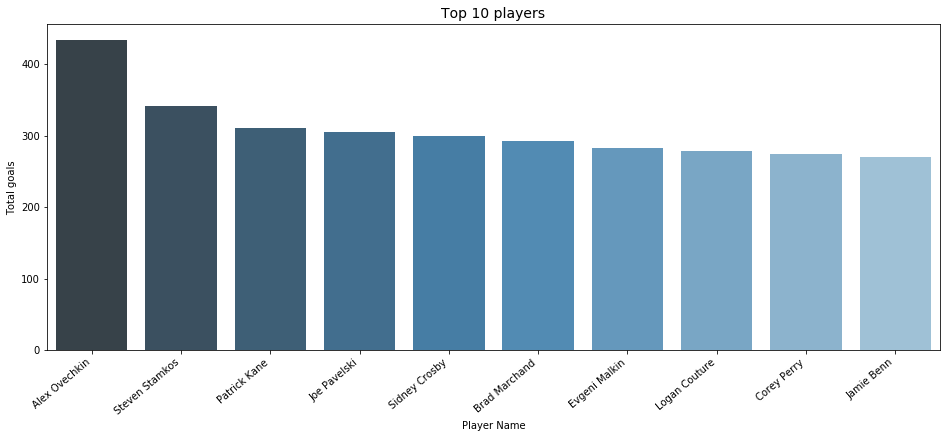

In [44]:
x = top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('total_goals', ascending=False).head(10)['player_name']
y = top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('total_goals', ascending=False).head(10)['total_goals']
display_bar_plot(x, y)
plt.xlabel('Player Name')
plt.ylabel('Total goals')
plt.title('Top 10 players', fontsize=14)
plt.show()

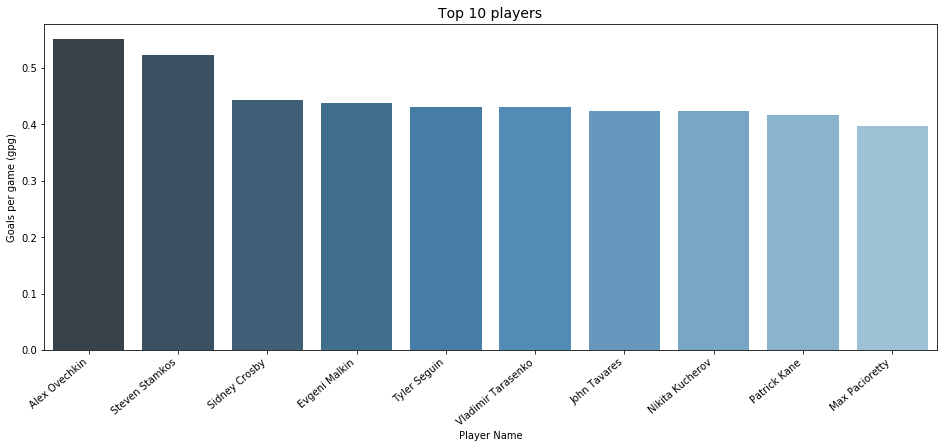

In [45]:
x = top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('gpg', ascending=False).head(10)['player_name']
y = top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('gpg', ascending=False).head(10)['gpg']
display_bar_plot(x, y)
plt.xlabel('Player Name')
plt.ylabel('Goals per game (gpg)')
plt.title('Top 10 players', fontsize=14)
plt.show()

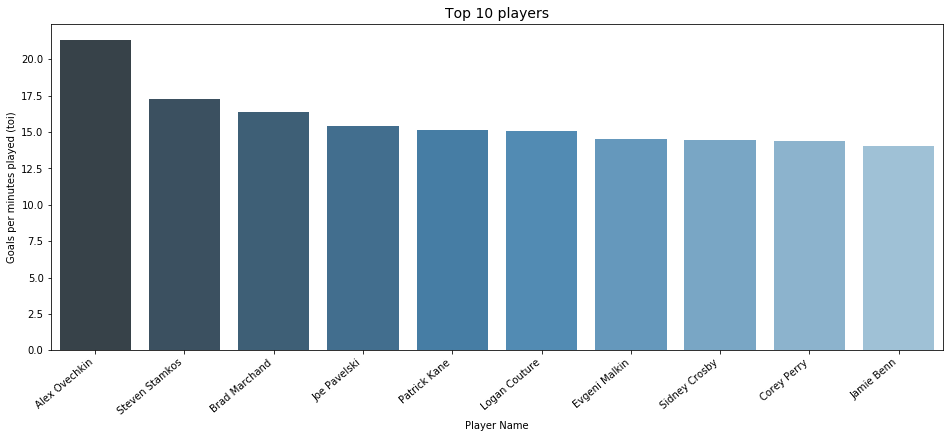

In [46]:
x = top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('goals_toi', ascending=False).head(10)['player_name']
y = top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('goals_toi', ascending=False).head(10)['goals_toi']
display_bar_plot(x, y)
plt.xlabel('Player Name')
plt.ylabel('Goals per minutes played (toi)')
plt.title('Top 10 players', fontsize=14)
plt.show()

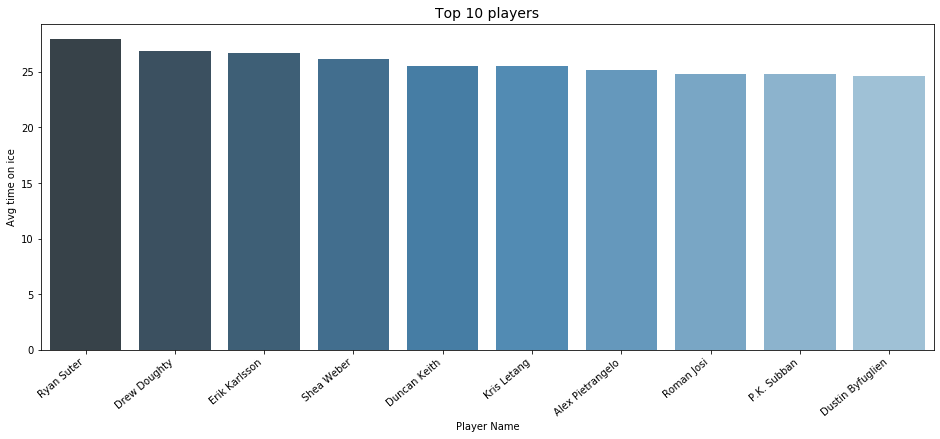

In [47]:
x = top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('avg_time_on_ice', ascending=False).head(10)['player_name']
y = top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('avg_time_on_ice', ascending=False).head(10)['avg_time_on_ice']
display_bar_plot(x, y)
plt.xlabel('Player Name')
plt.ylabel('Avg time on ice')
plt.title('Top 10 players', fontsize=14)
plt.show()

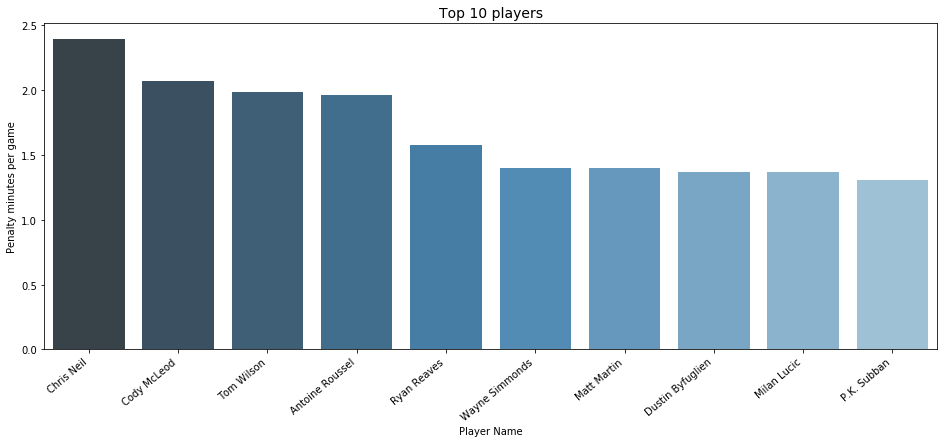

In [48]:
x = top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('penalty_minutes_per_game', ascending=False).head(10)['player_name']
y = top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('penalty_minutes_per_game', ascending=False).head(10)['penalty_minutes_per_game']
display_bar_plot(x, y)
plt.xlabel('Player Name')
plt.ylabel('Penalty minutes per game')
plt.title('Top 10 players', fontsize=14)
plt.show()

### What are the league's best 10 goalies?

In [49]:
goalie.head()

,game_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,...,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage,nationality,primaryPosition,birthDate,shortName,teamName,abbreviation,fullName
0,2011030221,3876,0,0,0,36,32,7,0,25,...,88.888889,87.5,89.285714,CAN,G,1972-05-06,New Jersey,Devils,NJD,Martin Brodeur
1,2011030221,3876,0,0,0,26,23,4,5,14,...,88.461538,80.0,87.500000,RUS,G,1980-06-22,Philadelphia,Flyers,PHI,Ilya Bryzgalov
2,2011030222,3599,0,0,0,20,19,1,3,15,...,95.000000,100.0,93.750000,CAN,G,1972-05-06,New Jersey,Devils,NJD,Martin Brodeur
3,2011030222,3559,0,0,0,34,31,6,0,25,...,91.176471,100.0,89.285714,RUS,G,1980-06-22,Philadelphia,Flyers,PHI,Ilya Bryzgalov
4,2011030223,4623,0,0,0,31,27,1,1,25,...,87.096774,50.0,89.285714,RUS,G,1980-06-22,Philadelphia,Flyers,PHI,Ilya Bryzgalov


In [50]:
top_10_goalies = goalie[['game_id','teamName','fullName','timeOnIce','savePercentage', 'shortHandedSaves']]\
    .groupby(['teamName','fullName'], as_index=False)\
    .agg({'game_id':'count', 'savePercentage':'mean', 'timeOnIce':'mean', 'shortHandedSaves':'mean'})\

In [51]:
top_10_goalies.head()

,teamName,fullName,game_id,savePercentage,timeOnIce,shortHandedSaves
0,Avalanche,Andrew Hammond,4,94.550915,2937.750000,1.000000
1,Avalanche,Brian Elliott,12,88.608656,3450.833333,0.583333
2,Avalanche,Calvin Pickard,86,90.634598,3279.627907,0.651163
3,Avalanche,Craig Anderson,33,88.653266,3291.454545,0.606061
4,Avalanche,Jean-Sebastien Giguere,72,91.317463,3282.708333,0.500000


In [52]:
top_10_goalies.columns = ['team_name','player_name','games_played','avg_save_percentage','avg_time_on_ice', 'avg_short_handed_saves']

In [53]:
# Let's convert the time on ice from seconds to minutes
top_10_goalies['avg_time_on_ice'] = top_10_goalies['avg_time_on_ice'] / 60

In [54]:
top_10_goalies.head()

,team_name,player_name,games_played,avg_save_percentage,avg_time_on_ice,avg_short_handed_saves
0,Avalanche,Andrew Hammond,4,94.550915,48.962500,1.000000
1,Avalanche,Brian Elliott,12,88.608656,57.513889,0.583333
2,Avalanche,Calvin Pickard,86,90.634598,54.660465,0.651163
3,Avalanche,Craig Anderson,33,88.653266,54.857576,0.606061
4,Avalanche,Jean-Sebastien Giguere,72,91.317463,54.711806,0.500000


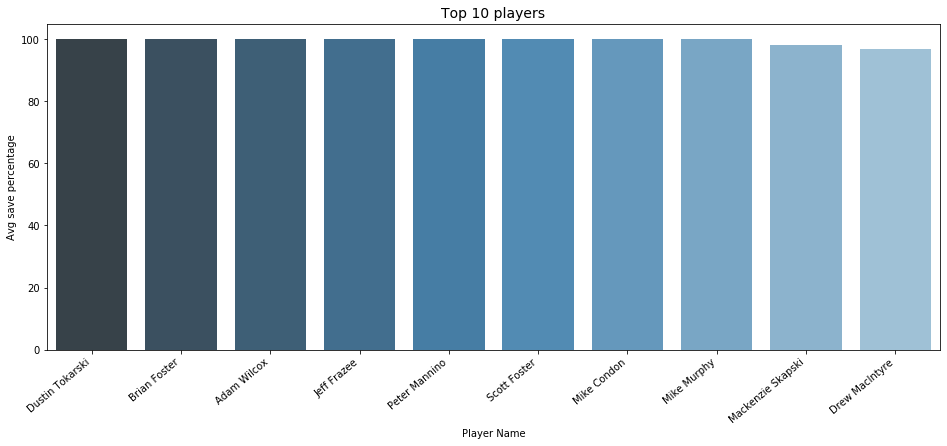

In [55]:
x = top_10_goalies.sort_values('avg_save_percentage', ascending=False).head(10)['player_name']
y = top_10_goalies.sort_values('avg_save_percentage', ascending=False).head(10)['avg_save_percentage']
display_bar_plot(x, y)
plt.xlabel('Player Name')
plt.ylabel('Avg save percentage')
plt.title('Top 10 players', fontsize=14)
plt.show()

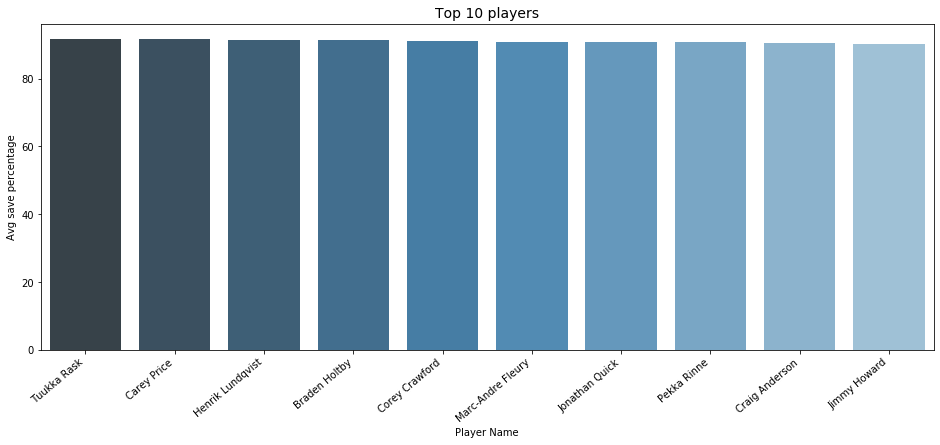

In [56]:
x = top_10_goalies[top_10_goalies['games_played'] > min_games].sort_values('avg_save_percentage', ascending=False).head(10)['player_name']
y = top_10_goalies[top_10_goalies['games_played'] > min_games].sort_values('avg_save_percentage', ascending=False).head(10)['avg_save_percentage']
display_bar_plot(x, y)
plt.xlabel('Player Name')
plt.ylabel('Avg save percentage')
plt.title('Top 10 players', fontsize=14)
plt.show()

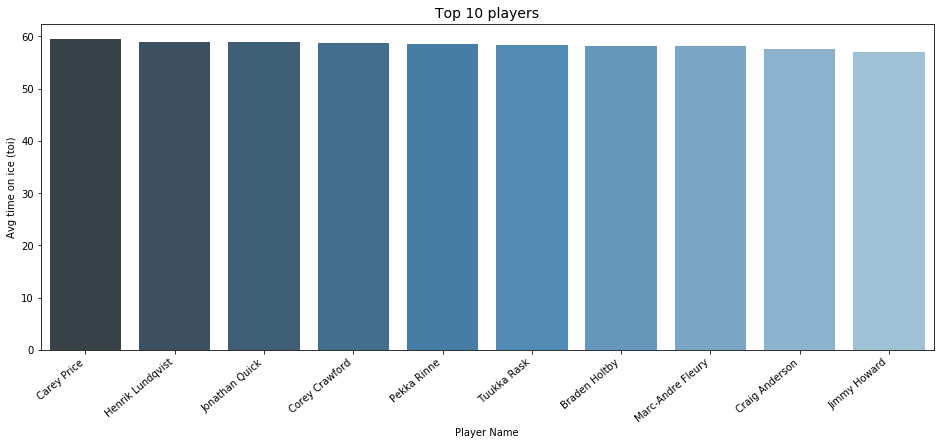

In [57]:
x = top_10_goalies[top_10_goalies['games_played'] > min_games].sort_values('avg_time_on_ice', ascending=False).head(10)['player_name']
y = top_10_goalies[top_10_goalies['games_played'] > min_games].sort_values('avg_time_on_ice', ascending=False).head(10)['avg_time_on_ice']
display_bar_plot(x, y)
plt.xlabel('Player Name')
plt.ylabel('Avg time on ice (toi)')
plt.title('Top 10 players', fontsize=14)
plt.show()

In [58]:
# Let's see also how avg_save_percentage relate to time on ice (toi)
top_10_goalies['avg_save_percentage_by_toi'] = top_10_goalies['avg_save_percentage'] / (top_10_goalies['avg_time_on_ice'])

# Now we look at the top 10 players
top_10_goalies[top_10_goalies['games_played'] > min_games].sort_values('avg_save_percentage', ascending=False).head(10)

,team_name,player_name,games_played,avg_save_percentage,avg_time_on_ice,avg_short_handed_saves,avg_save_percentage_by_toi
61,Bruins,Tuukka Rask,521,91.556748,58.291043,0.687140,1.570683
67,Canadiens,Carey Price,531,91.497122,59.423760,0.821092,1.539740
314,Rangers,Henrik Lundqvist,617,91.322216,58.916397,0.732577,1.550031
82,Capitals,Braden Holtby,509,91.225530,58.183694,0.730845,1.567888
20,Blackhawks,Corey Crawford,526,91.070437,58.748289,0.579848,1.550180
294,Penguins,Marc-Andre Fleury,442,90.812083,58.134201,0.680995,1.562111
225,Kings,Jonathan Quick,562,90.810004,58.882918,0.633452,1.542213
308,Predators,Pekka Rinne,593,90.776247,58.564193,0.569983,1.550030
352,Senators,Craig Anderson,441,90.580939,57.631897,0.775510,1.571715
321,Red Wings,Jimmy Howard,480,90.291479,56.937222,0.683333,1.585808


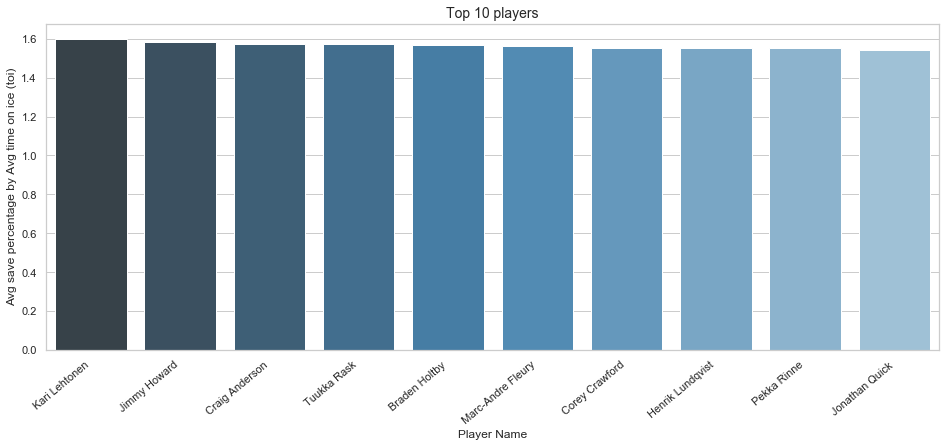

In [69]:
x = top_10_goalies[top_10_goalies['games_played'] > min_games].sort_values('avg_save_percentage_by_toi', ascending=False).head(10)['player_name']
y = top_10_goalies[top_10_goalies['games_played'] > min_games].sort_values('avg_save_percentage_by_toi', ascending=False).head(10)['avg_save_percentage_by_toi']
display_bar_plot(x, y)
plt.xlabel('Player Name')
plt.ylabel('Avg save percentage by Avg time on ice (toi)')
plt.title('Top 10 players', fontsize=14)
plt.show()

## What are the best scorers per team?

In [59]:
skater_reindexed = skater[['goals', 'teamName', 'fullName']].groupby(['teamName', 'fullName']).agg({'goals':'sum'})\
                                         .sort_values(by=['teamName', 'goals'], ascending=[True, False])\
                                         .reset_index(drop=False)

In [60]:
top_3_per_team = skater_reindexed.groupby(['teamName']).head(3)

In [61]:
indice = top_3_per_team['teamName'] + ' - ' + top_3_per_team['fullName']

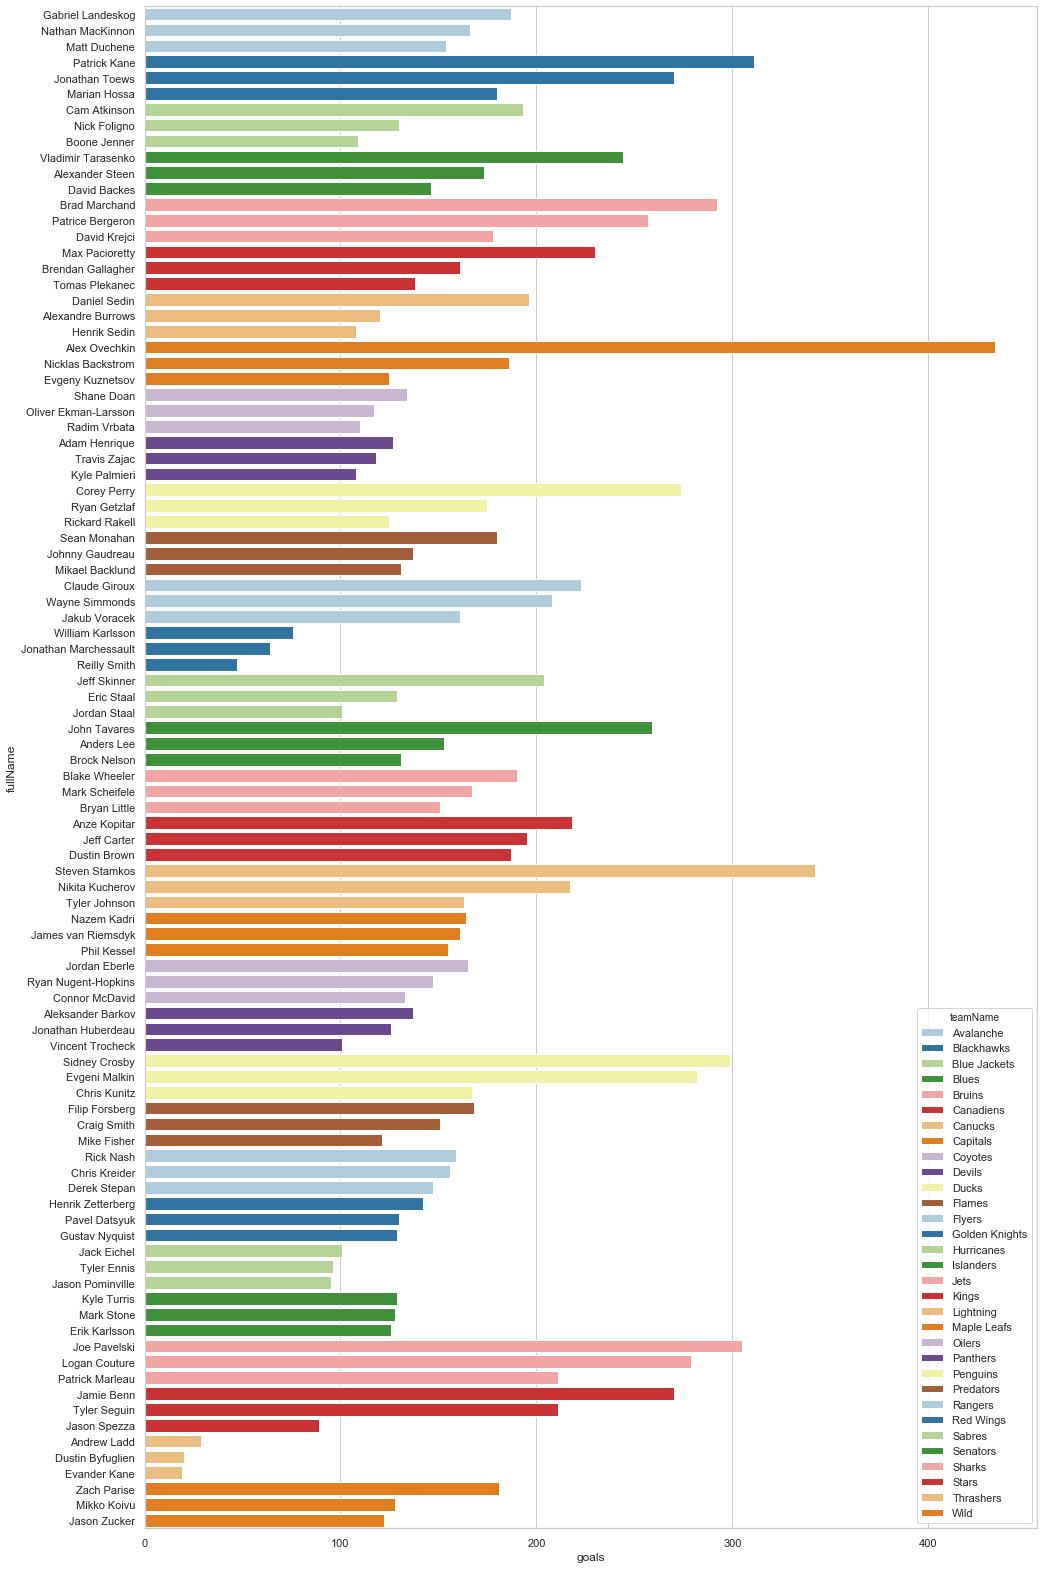

In [62]:
sns.set(rc={'figure.figsize':(16,28)})
sns.set(style="whitegrid")
sns.barplot(x='goals', y='fullName', hue='teamName', data=top_3_per_team, palette='Paired', dodge=False);

### Do home teams win more games?

In [70]:
game.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29 19:00:00+00:00,1,4,3,4,home win OT,right,Wells Fargo Center,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01 23:30:00+00:00,1,4,4,1,away win REG,right,Wells Fargo Center,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03 23:30:00+00:00,4,1,3,4,home win OT,left,Prudential Center,America/New_York,-4,EDT
3,2011030224,20112012,P,2012-05-06,2012-05-06 23:30:00+00:00,4,1,2,4,home win REG,left,Prudential Center,America/New_York,-4,EDT
4,2011030225,20112012,P,2012-05-08,2012-05-08 23:30:00+00:00,1,4,3,1,away win REG,right,Wells Fargo Center,America/New_York,-4,EDT


In [74]:
game = game.assign(home_team_name=game['home_team_id'].apply(lambda x: team_info[team_info['team_id'] == x]['teamName'].values[0]))

In [75]:
game = game.assign(away_team_name=game['away_team_id'].apply(lambda x: team_info[team_info['team_id'] == x]['teamName'].values[0]))

In [76]:
game.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,away_team_name,home_team_name
0,2011030221,20112012,P,2012-04-29,2012-04-29 19:00:00+00:00,1,4,3,4,home win OT,right,Wells Fargo Center,America/New_York,-4,EDT,Devils,Flyers
1,2011030222,20112012,P,2012-05-01,2012-05-01 23:30:00+00:00,1,4,4,1,away win REG,right,Wells Fargo Center,America/New_York,-4,EDT,Devils,Flyers
2,2011030223,20112012,P,2012-05-03,2012-05-03 23:30:00+00:00,4,1,3,4,home win OT,left,Prudential Center,America/New_York,-4,EDT,Flyers,Devils
3,2011030224,20112012,P,2012-05-06,2012-05-06 23:30:00+00:00,4,1,2,4,home win REG,left,Prudential Center,America/New_York,-4,EDT,Flyers,Devils
4,2011030225,20112012,P,2012-05-08,2012-05-08 23:30:00+00:00,1,4,3,1,away win REG,right,Wells Fargo Center,America/New_York,-4,EDT,Devils,Flyers


## Some plots I use to get an idea of the data

In [63]:
#skater.hist(bins=20, figsize=(20, 15));

In [64]:
#attributes = ['timeOnIce', 'assists', 'goals', 'shots', 'hits', 'powerPlayGoals',
#              'powerPlayAssists', 'penaltyMinutes', 'powerPlayTimeOnIce']

In [65]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(skater[attributes], figsize=(20, 15));

In [66]:
#skater.head()

## Playing with data merged

In [67]:
display_all(skater_2.head())

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,firstName,lastName,nationality,primaryPosition,birthDate,shortName,teamName,abbreviation,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,8467412,1,999,0,0,1,3,0,0,0,0,0,0,0,0,0,0,-1,885,98,16,Alexei,Ponikarovsky,UKR,LW,1980-04-09,New Jersey,Devils,NJD,20112012,P,2012-04-29,2012-04-29 19:00:00+00:00,1,4,3,4,home win OT,right,Wells Fargo Center,America/New_York,-4,EDT
1,2011030221,8468501,1,1168,0,0,0,4,0,0,0,0,0,1,1,0,0,1,0,767,401,0,Anton,Volchenkov,RUS,D,1982-02-25,New Jersey,Devils,NJD,20112012,P,2012-04-29,2012-04-29 19:00:00+00:00,1,4,3,4,home win OT,right,Wells Fargo Center,America/New_York,-4,EDT
2,2011030221,8470609,1,558,0,0,2,1,0,0,0,0,2,0,0,0,0,1,-1,542,0,16,Steve,Bernier,CAN,RW,1985-03-31,New Jersey,Devils,NJD,20112012,P,2012-04-29,2012-04-29 19:00:00+00:00,1,4,3,4,home win OT,right,Wells Fargo Center,America/New_York,-4,EDT
3,2011030221,8471816,1,1134,0,0,1,4,0,0,0,0,0,1,0,0,0,1,-1,935,183,16,Mark,Fayne,USA,D,1987-05-15,New Jersey,Devils,NJD,20112012,P,2012-04-29,2012-04-29 19:00:00+00:00,1,4,3,4,home win OT,right,Wells Fargo Center,America/New_York,-4,EDT
4,2011030221,8472410,1,436,0,0,1,3,0,0,0,3,6,0,0,0,0,0,-1,436,0,0,Stephen,Gionta,USA,RW,1983-10-09,New Jersey,Devils,NJD,20112012,P,2012-04-29,2012-04-29 19:00:00+00:00,1,4,3,4,home win OT,right,Wells Fargo Center,America/New_York,-4,EDT


In [68]:
skater_top_scorers = skater_2[['game_id','timeOnIce','goals','teamName','fullName']] 

KeyError: "['fullName'] not in index"

In [ ]:
test_df = skater_top_scorers[(skater_top_scorers['fullName'] == 'Alex Ovechkin') & (skater_top_scorers['goals'] >= 3)]

In [ ]:
test_df = skater_top_scorers[['game_id','teamName','fullName','timeOnIce','goals']]\
    .groupby(['teamName','fullName'])\
    .agg({'game_id':'count', 'goals':'sum', 'timeOnIce':'mean'})\
    .reset_index(drop=False)

In [ ]:
test_df.columns = ['team_name','player_name','games_played','total_goals','time_on_ice', 'gpg', 'goals_toi']

In [ ]:
test_df.head()

In [ ]:
test_df['time_on_ice'] = test_df['time_on_ice'] / 60

In [ ]:
test_df['gpg'] = test_df['total_goals'] / test_df['games_played']

In [ ]:
test_df[test_df['games_played'] > 164].sort_values('goals_toi', ascending=False).head(10)

In [ ]:
test_df_2['goals'].sum()/test_df_2['game_id'].count()

In [ ]:
test_df_2['game_id'].count()

In [ ]:
1675.545614/60

In [ ]:
skater_top_scorers[[(skater_top_scorers['fullName'] == 'Alex Ovechkin') & (skater_top_scorers['game_id'] == '2018030134')]]